In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [78]:
data = pd.read_csv('/kaggle/input/advertisinganalysis/Advertising.csv')

In [79]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [80]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [81]:
import plotly.express as px
import plotly.graph_objects as go

In [82]:
figure = px.scatter(data_frame = data, x = 'Sales', y = 'TV', size='TV', trendline='ols')
figure.show()

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='Sales', ylabel='TV'>

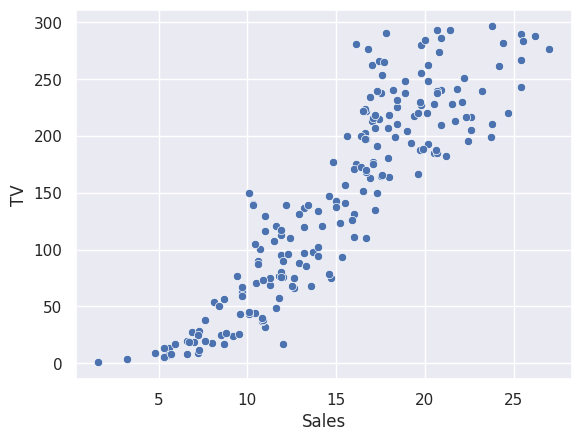

In [84]:
sns.scatterplot(data=data, x='Sales', y='TV')

<Axes: xlabel='Sales', ylabel='Newspaper'>

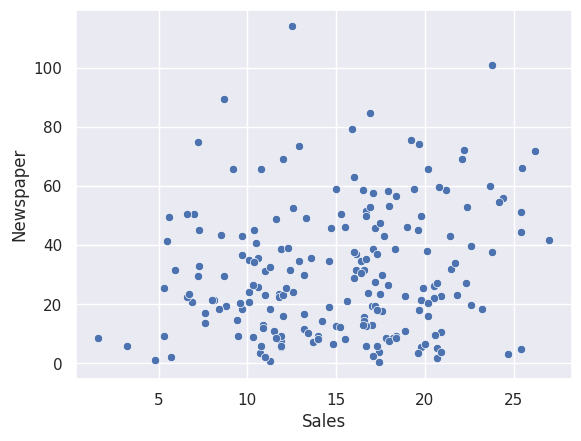

In [85]:
sns.scatterplot(data = data, x = 'Sales', y = 'Newspaper')

In [86]:
# cari korelasi tiap kolom

corr = data.corr()
corr['Sales'].sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

In [87]:
x = np.array(data.drop(['Sales'], axis=1))
y = np.array(data['Sales'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [88]:
model_1 = LinearRegression()
model_1.fit(x_train, y_train)

model_1.score(x_test, y_test)

0.8823635450858103

In [89]:
from sklearn.ensemble import RandomForestRegressor  # For regression

In [90]:
model_2 = RandomForestRegressor()
model_2.fit(x_train, y_train)

model_2.score(x_test, y_test)

0.93583409361228

In [91]:
from sklearn.svm import SVR

In [92]:
C = 400

model_3 = SVR(kernel='rbf', C=C)
model_3.fit(x_train, y_train)
model_3.score(x_test, y_test)

0.9439004058800134

In [93]:
features = np.array([[230.1, 37.8, 69.2]])
model.predict

<bound method LinearModel.predict of LinearRegression()>

## **Mobile Price Train Data**

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [94]:
data_2 = pd.read_csv('/kaggle/input/mobile-price-train-data/train.csv')

In [95]:
sns.set()

In [96]:
data_2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


<Axes: >

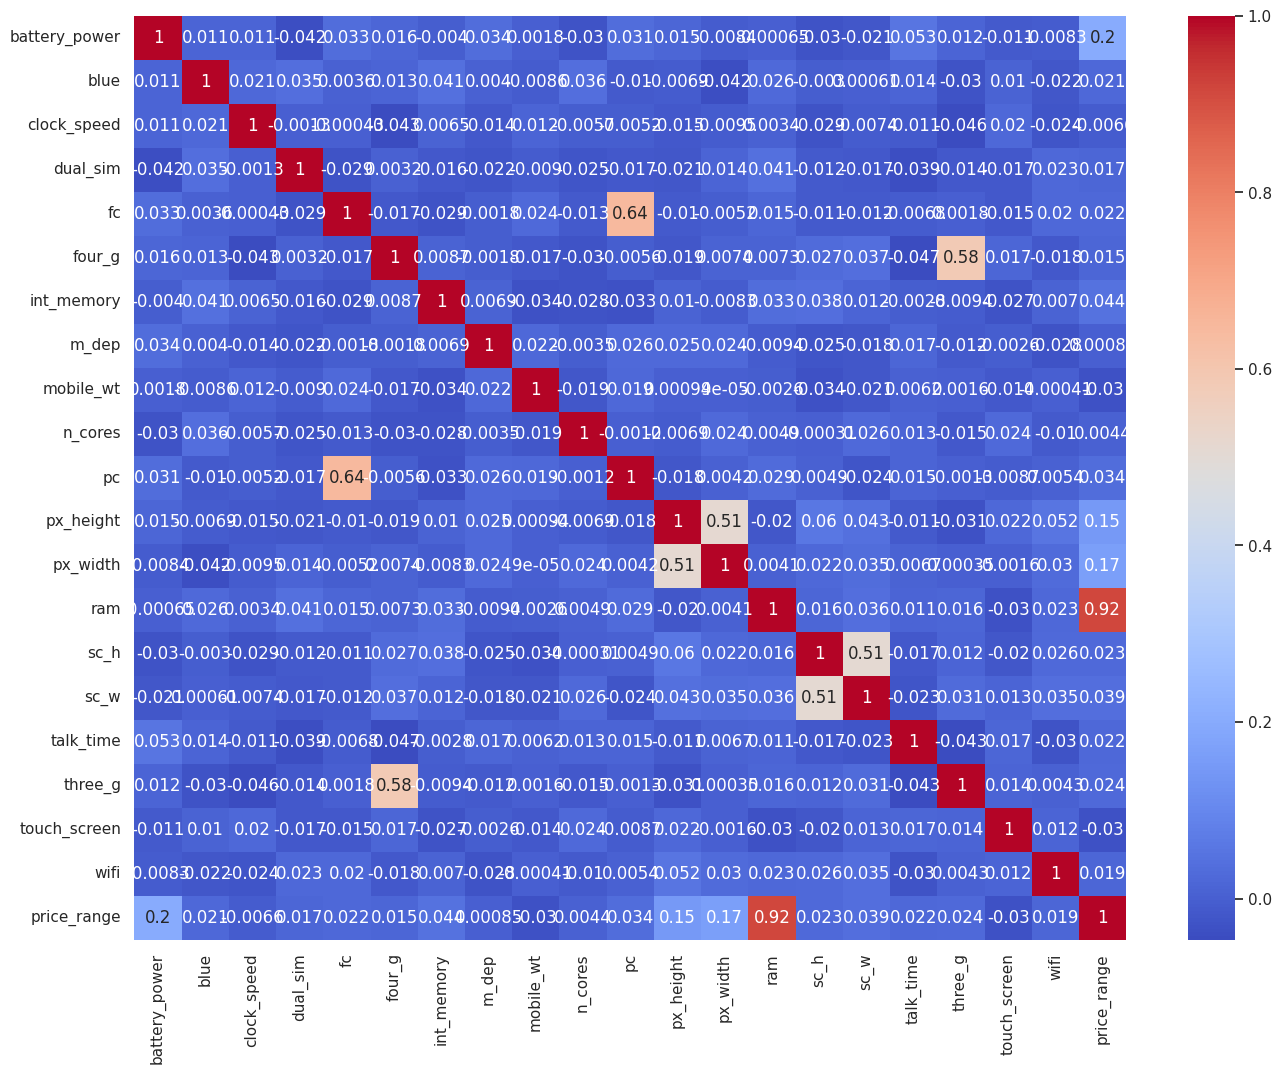

In [97]:
plt.figure(figsize=(16, 12))
sns.heatmap(data_2.corr(), annot=True, cmap='coolwarm')

In [98]:
x = data_2.iloc[:, :-1].values
y = data_2.iloc[:, -1].values

In [99]:
print(y)

[1 2 2 ... 3 0 3]


In [100]:
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=41)

In [103]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(x_train, y_train)

y_pred = lreg.predict(x_test)

In [104]:
acc = accuracy_score(y_test, y_pred) * 100
acc

97.0

In [119]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')  # atau 'rbf' untuk non-linear
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

acc = accuracy_score(y_test, y_pred) * 100
acc

96.25

In [122]:
y_pred

array([0, 2, 2, 3, 2, 3, 1, 2, 0, 0, 2, 2, 3, 0, 1, 3, 1, 2, 2, 3, 2, 3,
       0, 0, 1, 0, 0, 0, 0, 1, 3, 2, 0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 2,
       3, 1, 3, 2, 1, 0, 2, 2, 2, 1, 1, 1, 3, 3, 3, 2, 0, 3, 2, 0, 2, 3,
       1, 1, 0, 1, 1, 0, 2, 0, 2, 3, 0, 3, 1, 3, 3, 3, 0, 3, 2, 0, 3, 2,
       0, 2, 3, 1, 3, 0, 1, 0, 3, 3, 0, 3, 2, 3, 0, 1, 0, 2, 1, 1, 1, 3,
       2, 0, 2, 3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 1, 2, 2, 0, 1, 0, 2, 2, 3,
       2, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 3, 1, 0,
       2, 3, 1, 3, 2, 1, 0, 0, 0, 2, 3, 1, 0, 0, 3, 3, 1, 2, 2, 3, 2, 3,
       2, 0, 2, 3, 3, 1, 3, 3, 3, 2, 0, 2, 0, 0, 0, 0, 2, 3, 2, 2, 3, 3,
       1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 3, 2, 3, 3, 0, 1,
       0, 1, 0, 3, 3, 3, 1, 0, 2, 1, 0, 2, 1, 1, 3, 0, 1, 2, 3, 1, 0, 2,
       3, 2, 2, 0, 0, 3, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 3, 3, 0, 0, 1,
       0, 3, 0, 2, 2, 3, 1, 2, 2, 1, 0, 3, 0, 1, 1, 2, 3, 0, 0, 3, 3, 1,
       3, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 1, 2, 1, 2,

In [130]:
(unique, counts) = np.unique(y_pred, return_counts=True)
price_range = np.asarray((unique, counts))
price_range_2 = np.asarray((unique, counts)).T

print(price_range, '\n -----------------')
print(price_range_2)

[[  0   1   2   3]
 [ 99  96  99 106]] 
 -----------------
[[  0  99]
 [  1  96]
 [  2  99]
 [  3 106]]


## **Salary Prediction**

In [131]:
data_3 = pd.read_csv('/kaggle/input/salary-data/Salary_Data.csv')